In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plta
!pip install pystan fbprophet
from fbprophet import Prophet

In [63]:
df = pd.read_csv('30dayshourly.csv')
df=df.iloc[:-24]
df.head()

,_time,IP_Sessions(K)
0,2021-05-22T00:00:00.000-0400,11951.524
1,2021-05-22T01:00:00.000-0400,11879.647
2,2021-05-22T02:00:00.000-0400,11782.014
3,2021-05-22T03:00:00.000-0400,11737.477
4,2021-05-22T04:00:00.000-0400,11695.114


In [64]:
df.columns=['ds','y']
df.head()

,ds,y
0,2021-05-22T00:00:00.000-0400,11951.524
1,2021-05-22T01:00:00.000-0400,11879.647
2,2021-05-22T02:00:00.000-0400,11782.014
3,2021-05-22T03:00:00.000-0400,11737.477
4,2021-05-22T04:00:00.000-0400,11695.114


In [65]:
df['ds'] = pd.to_datetime(df['ds'])

In [66]:
df['ds'] = df['ds'].dt.tz_convert(None)

In [67]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [68]:
future = m.make_future_dataframe(periods=32,freq='h')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
745,2021-06-22 05:00:00,12298.170431,12020.643603,12203.689200,12251.529807,12343.322292,-185.139398,-185.139398,-185.139398,-249.512388,-249.512388,-249.512388,64.372990,64.372990,64.372990,0.0,0.0,0.0,12113.031033
746,2021-06-22 06:00:00,12298.523639,11948.413229,12123.536327,12249.298886,12345.827330,-262.450847,-262.450847,-262.450847,-326.647485,-326.647485,-326.647485,64.196638,64.196638,64.196638,0.0,0.0,0.0,12036.072793
747,2021-06-22 07:00:00,12298.876848,11888.441978,12072.767124,12246.202197,12348.505278,-319.950096,-319.950096,-319.950096,-383.763782,-383.763782,-383.763782,63.813686,63.813686,63.813686,0.0,0.0,0.0,11978.926752
748,2021-06-22 08:00:00,12299.230057,11862.045229,12035.723674,12243.075692,12351.527350,-350.633138,-350.633138,-350.633138,-413.874916,-413.874916,-413.874916,63.241778,63.241778,63.241778,0.0,0.0,0.0,11948.596919
749,2021-06-22 09:00:00,12299.583266,11867.467309,12061.004771,12241.372653,12355.017091,-341.012178,-341.012178,-341.012178,-403.511335,-403.511335,-403.511335,62.499157,62.499157,62.499157,0.0,0.0,0.0,11958.571088


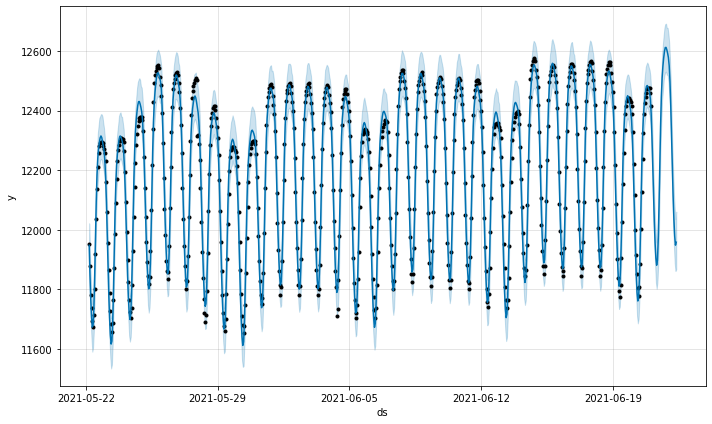

In [69]:
plot1 = m.plot(forecast)

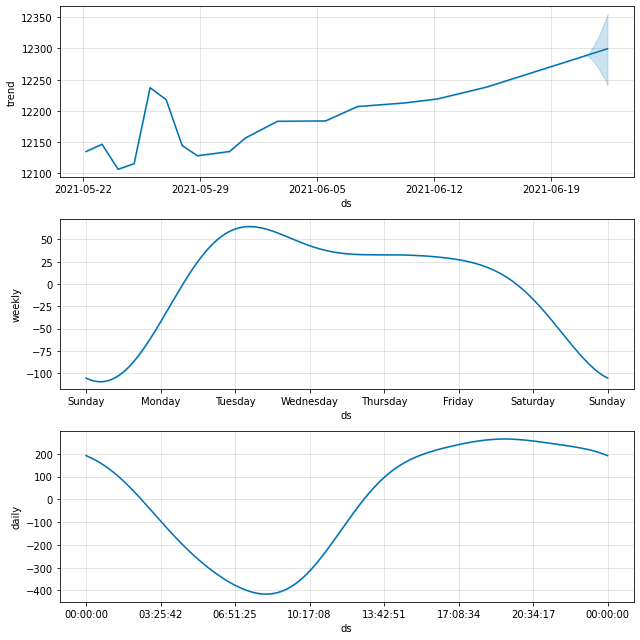

In [70]:
plot2 = m.plot_components(forecast)

In [71]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
745,2021-06-22 05:00:00,12298.170431,12020.643603,12203.689200,12251.529807,12343.322292,-185.139398,-185.139398,-185.139398,-249.512388,-249.512388,-249.512388,64.372990,64.372990,64.372990,0.0,0.0,0.0,12113.031033
746,2021-06-22 06:00:00,12298.523639,11948.413229,12123.536327,12249.298886,12345.827330,-262.450847,-262.450847,-262.450847,-326.647485,-326.647485,-326.647485,64.196638,64.196638,64.196638,0.0,0.0,0.0,12036.072793
747,2021-06-22 07:00:00,12298.876848,11888.441978,12072.767124,12246.202197,12348.505278,-319.950096,-319.950096,-319.950096,-383.763782,-383.763782,-383.763782,63.813686,63.813686,63.813686,0.0,0.0,0.0,11978.926752
748,2021-06-22 08:00:00,12299.230057,11862.045229,12035.723674,12243.075692,12351.527350,-350.633138,-350.633138,-350.633138,-413.874916,-413.874916,-413.874916,63.241778,63.241778,63.241778,0.0,0.0,0.0,11948.596919
749,2021-06-22 09:00:00,12299.583266,11867.467309,12061.004771,12241.372653,12355.017091,-341.012178,-341.012178,-341.012178,-403.511335,-403.511335,-403.511335,62.499157,62.499157,62.499157,0.0,0.0,0.0,11958.571088
